In [1]:
import numpy as np # for numerical calculations such as histogramming
import matplotlib.pyplot as plt# for plotting

In [2]:
N = 2 # Dimensions
h = 0.0005
e = 0.6
PI = np.pi

In [3]:
def function (t, q, ii):
    f = -q[ii]/np.power(q[0]*q[0] + q[1]*q[1], 1.5)
    return f

In [4]:
def Stormer (t, h, q, p):
    pm = [0]*N
    ii = 0
    # p(n+1/2) = p(n) + h/2*f(q(n))
    for ii in range (0, N):
        pm[ii] = p[ii] + (h/2.0)*function(t, q, ii)
    
    jj = 0
    # q(n+1) = q(n) + h*p(n+1/2)
    for jj in range (0, N):
        q[jj] = q[jj] + h*pm[jj]
        
    kk = 0
    # p(n+1) = p(n+1/2) + h/2*f(q(n+1))
    for kk in range (0, N):
        p[kk] = pm[kk] + (h/2.0)*function(t, q, kk)

In [5]:
q = [1.0-e, 0]
p = [0, np.sqrt((1.0 + e)/(1.0 - e))]

x = []
y = []

t = 0
while t <= 200*PI:
    # Energía Total
    H = (1.0/2.0)*(p[0]*p[0] + p[1]*p[1]) - 1.0/np.sqrt(q[0]*q[0] + q[1]*q[1])
    # Momento Angular
    L = q[0]*p[1] - q[1]*p[0]
    #print(q[0], q[1], H, L)
    x.append(q[0])
    y.append(q[1])
    Stormer(t, h, q, p)
    t += h

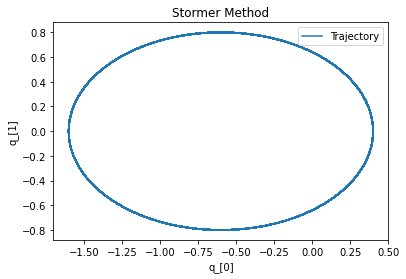

In [6]:
plt.plot(x, y, label = 'Trajectory')
plt.xlabel('q_[0]')
plt.ylabel('q_[1]')
plt.title("Stormer Method")
plt.legend()